In [65]:
"""
Radial graph matplotlib
"""
import pandas as pd
import numpy as np
import os

model_map = {
    'falcon-7b-instruct': "Falcon 7B", 
    'gpt-3.5-turbo-1106': "GPT-3.5",
    'Llama-2-7b-chat-hf': "Llama2 7B", 
    'mistral-instruct': "Mistral 7B",  
    'zephyr-7b-beta': "Zephyr 7B Beta"
}
personality_order = ['None', 'Openness', 'Conscientiousness', 'Extraversion','Agreeableness','Neuroticism', 'Narcissism', 'Machiavellianism', 'Psychopathy']

output_dir = r"D:\71 PsychLLM\outs"
tom_df = pd.read_csv(os.path.join(output_dir, 'fantom','consolidated.csv'))
if 'source' in tom_df.columns:
    tom_df = tom_df[tom_df['source']=='ours']
tom_df = tom_df[tom_df['personality'].isin(personality_order)]
tom_df = tom_df[tom_df['model'].isin(model_map.keys())]
tom_df['model']=tom_df['model'].apply(lambda x: model_map[x])
tom_df['personality'] = pd.Categorical(tom_df['personality'], categories=personality_order, ordered=True)
tom_df

,model,conversation_input_type,inaccessible:set:ALL*,inaccessible:set:ALL,inaccessible:belief:multiple-choice,inaccessible:answerability:binary-f1,inaccessible:info_accessibility:binary-f1,inaccessible:tom:binary:wrong_reasons:freq,filename,personality,...,inaccessible:info_accessibility:set:ALL,inaccessible:info_accessibility:list,fact_word-f1,inaccessible:tom:lists:wrong_reasons:freq,inaccessible:first-order,inaccessible:second-order,inaccessible:second-order:acyclic,inaccessible:second-order:cyclic,inaccessible:set:ALL_character,inaccessible:set:character_answer_consistency
0,Falcon 7B,short,0.0,0.0,47.5,44.5,62.4,"{'false_negative': 201, 'false_positive': 854,...",D:\71 PsychLLM\outs\fantom\REPORT_short_input_...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GPT-3.5,short,0.2,0.2,9.6,61.9,59.8,"{'false_negative': 253, 'false_positive': 1054...",D:\71 PsychLLM\outs\fantom\REPORT_short_input_...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Llama2 7B,short,0.2,0.2,16.0,54.6,45.4,"{'false_negative': 565, 'false_positive': 777,...",D:\71 PsychLLM\outs\fantom\REPORT_short_input_...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mistral 7B,short,0.0,0.2,15.1,54.1,71.5,"{'false_negative': 873, 'false_positive': 769,...",D:\71 PsychLLM\outs\fantom\REPORT_short_input_...,None,...,3.6,11.1,54.2,"{'included_unaware_character': 225, 'excluded_...",16.0,14.8,14.3,15.3,27.1,40.9
6,Zephyr 7B Beta,short,0.5,0.5,21.5,50.7,40.3,"{'false_negative': 1363, 'false_positive': 205...",D:\71 PsychLLM\outs\fantom\REPORT_short_input_...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Falcon 7B,short,0.0,0.0,47.5,45.9,62.9,"{'false_negative': 173, 'false_positive': 883,...",D:\71 PsychLLM\outs\fantom\p2_ours\REPORT_shor...,Agreeableness,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Falcon 7B,short,0.0,0.0,47.5,45.1,62.4,"{'false_negative': 185, 'false_positive': 860,...",D:\71 PsychLLM\outs\fantom\p2_ours\REPORT_shor...,Conscientiousness,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Falcon 7B,short,0.0,0.0,47.5,45.7,62.8,"{'false_negative': 159, 'false_positive': 876,...",D:\71 PsychLLM\outs\fantom\p2_ours\REPORT_shor...,Extraversion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Falcon 7B,short,0.0,0.0,47.5,46.3,63.3,"{'false_negative': 243, 'false_positive': 858,...",D:\71 PsychLLM\outs\fantom\p2_ours\REPORT_shor...,Machiavellianism,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Falcon 7B,short,0.0,0.0,47.5,44.8,63.7,"{'false_negative': 198, 'false_positive': 835,...",D:\71 PsychLLM\outs\fantom\p2_ours\REPORT_shor...,Narcissism,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


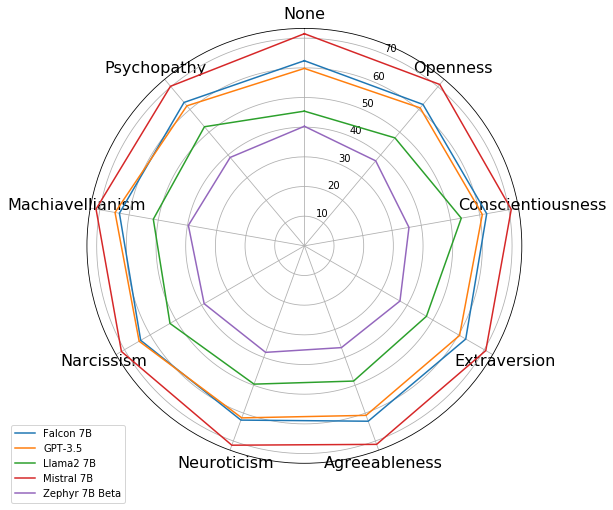

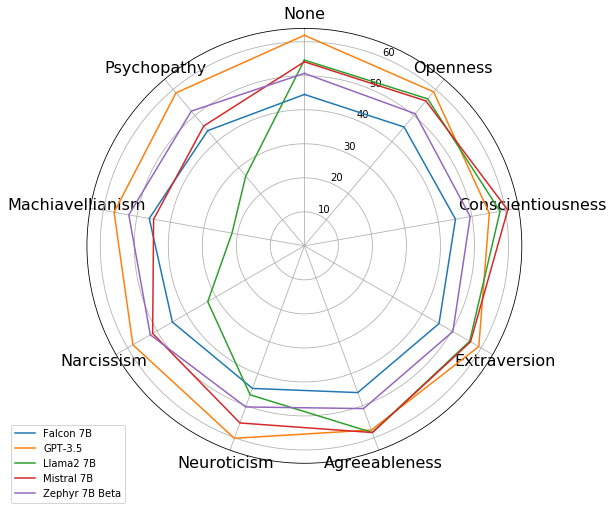

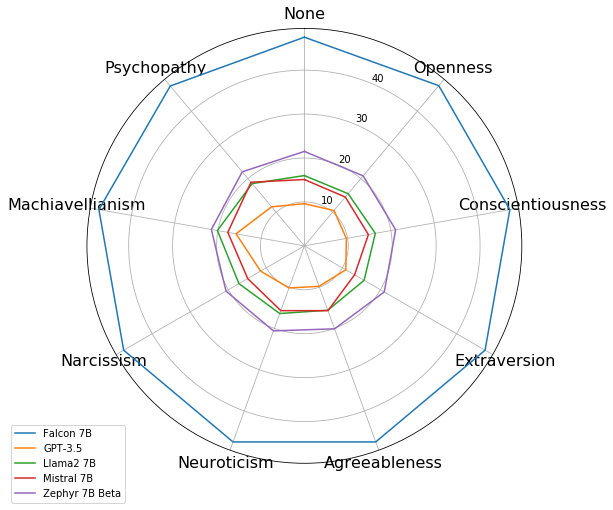

In [66]:
import matplotlib.pyplot as plt

focus_tasks = ['inaccessible:info_accessibility:binary-f1','inaccessible:answerability:binary-f1','inaccessible:belief:multiple-choice']
for task in focus_tasks:

    # Pivot the DataFrame
    pivot_df = tom_df.pivot(index='model', columns='personality', values=task)

    # Plotting
    categories = list(pivot_df.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for model, values in pivot_df.iterrows():
        values = list(values)
        values += values[:1]
        ax.plot(angles, values, label=model)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, fontsize=16)
    ax.yaxis.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()


C:\Users\effbl\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


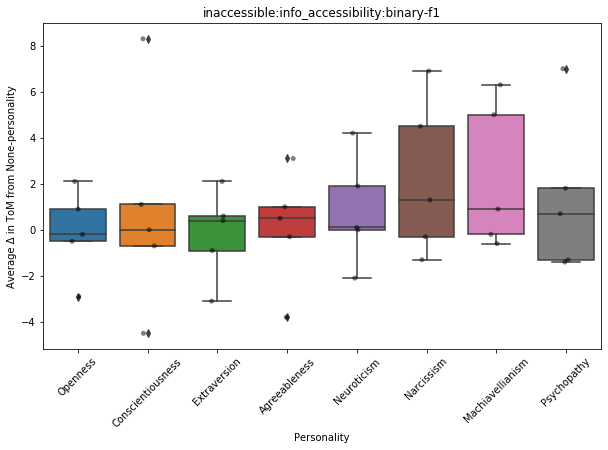

C:\Users\effbl\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


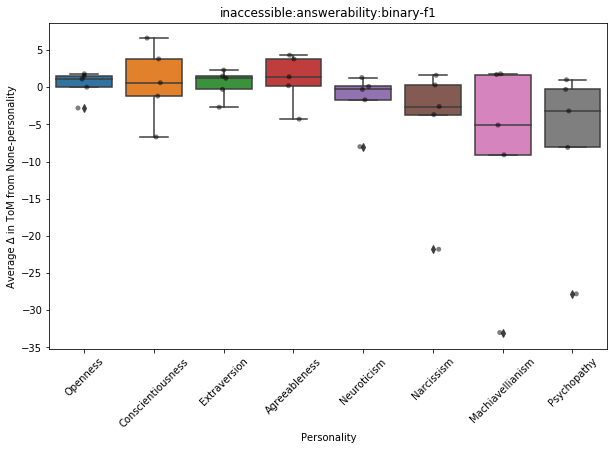

C:\Users\effbl\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


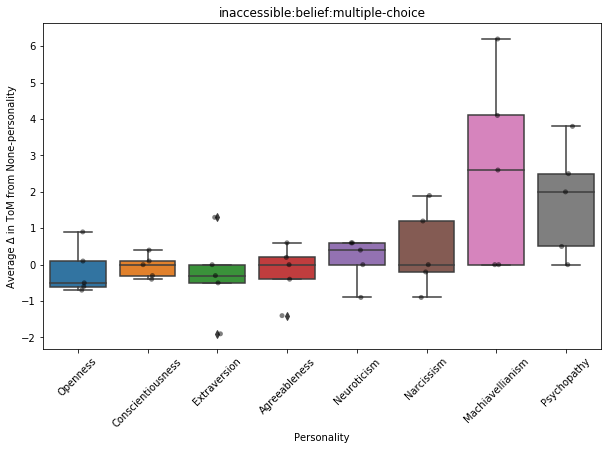

In [52]:
"""
Boxplots
"""

focus_tasks = ['inaccessible:info_accessibility:binary-f1','inaccessible:answerability:binary-f1','inaccessible:belief:multiple-choice']
stacked_p = []
stacked_v = []
for focus in focus_tasks:

    ddict = {k:v for k,v in zip(tom_df[tom_df['personality'] == 'None']['model'], tom_df[tom_df['personality'] == 'None'][focus])}
    tom_df[f'difference_{focus}'] = [v-ddict[m] if not pd.isnull(v) else None for m,v in zip(tom_df['model'], tom_df[focus])]

    plt.figure(figsize=(10, 6))
    tom_df['personality'] = tom_df['personality'].astype(str)
    tmp_df = tom_df[tom_df['personality']!='None']
    tmp_df['order'] = pd.Categorical(tmp_df['personality'], categories=personality_order, ordered=True)
    tmp_df = tmp_df.sort_values(by='order')
    sns.stripplot(data = tmp_df, y = f'difference_{focus}', x='personality', jitter=True, color='black', alpha=0.5)
    sns.boxplot(data = tmp_df, y = f'difference_{focus}', x='personality')
    plt.title(focus)
    plt.xlabel('Personality')
    plt.ylabel('Average Δ in ToM from None-personality')
    plt.suptitle('')
    plt.xticks(rotation=45)
    f2 = focus.split(':')[1]
    plt.savefig(f"boxplot_{f2}.svg", format="svg")
    plt.show()

    stacked_v.extend(tom_df[f'difference_{focus}'])
    stacked_p.extend(tom_df[f'personality'])

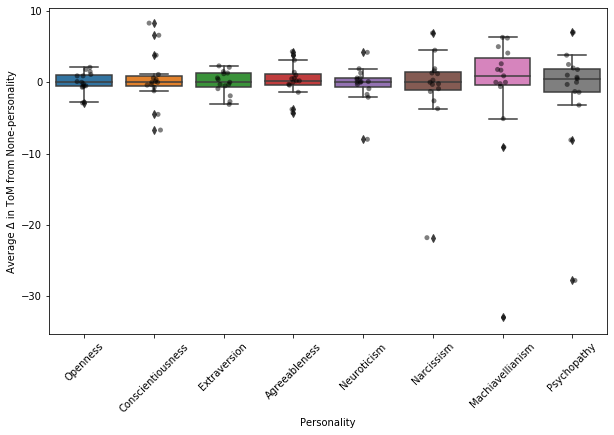

In [39]:
# Across ALL tasks

import seaborn as sns

tmp_df = pd.DataFrame()
tmp_df['personality']=stacked_p
tmp_df['scores']=stacked_v
tmp_df['order'] = pd.Categorical(tmp_df['personality'], categories=personality_order, ordered=True)
tmp_df = tmp_df.sort_values(by='order')
tmp_df = tmp_df[tmp_df['personality']!='None']
# ax = sns.boxplot(data = tmp_df, x = 'personality', y='scores')
# plt.xlabel('Personality')
# plt.ylabel('Average Δ in ToM from None-personality')
# plt.suptitle('')  # Removing the automatically generated title
# plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
# plt.savefig("boxplot.svg", format="svg")
# plt.show()
plt.figure(figsize=(10, 6))
sns.stripplot(data = tmp_df, x = 'personality', y='scores', jitter=True, color='black', alpha=0.5)
sns.boxplot(data = tmp_df, x = 'personality', y='scores')
plt.xlabel('Personality')
plt.ylabel('Average Δ in ToM from None-personality')
plt.suptitle('')
plt.xticks(rotation=45)
plt.savefig("boxplot.svg", format="svg")
plt.show()

In [30]:
tmp_df

,personality,scores,order
56,Openness,1.1,Openness
133,Openness,-0.7,Openness
27,Openness,2.1,Openness
64,Openness,-2.8,Openness
35,Openness,-0.5,Openness
...,...,...,...
20,Psychopathy,1.8,Psychopathy
102,Psychopathy,-6.5,Psychopathy
12,Psychopathy,0.7,Psychopathy
28,Psychopathy,7.0,Psychopathy


In [67]:
mpi_df = pd.read_csv(os.path.join(output_dir, 'personality','consolidated.csv'))
mpi_df.columns

Index(['filename', 'model', 'personality', 'A_mean', 'C_mean', 'E_mean',
       'N_mean', 'O_mean', 'A_std', 'C_std', 'E_std', 'N_std', 'O_std'],
      dtype='object')

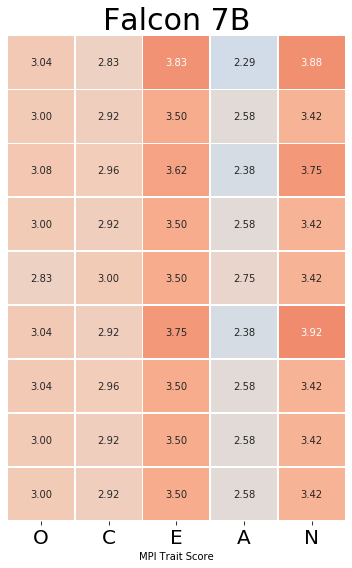

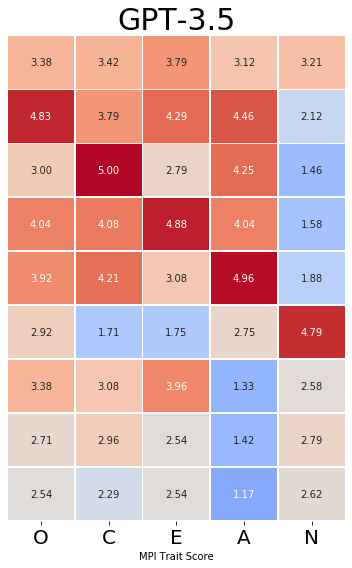

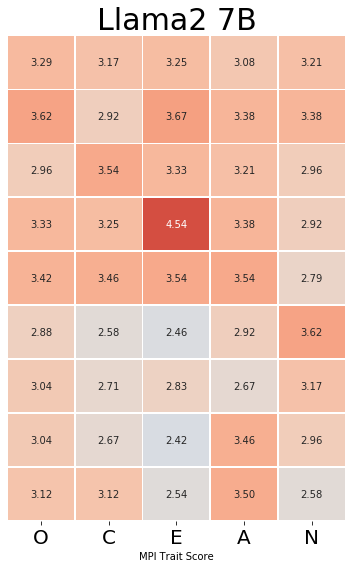

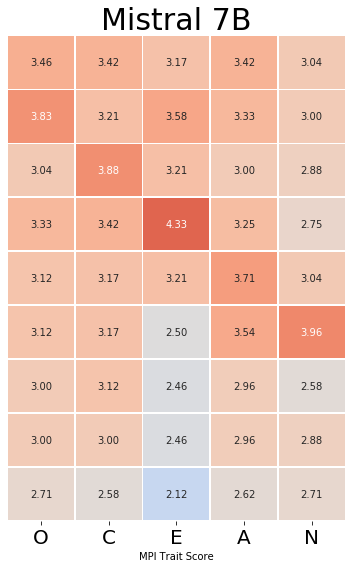

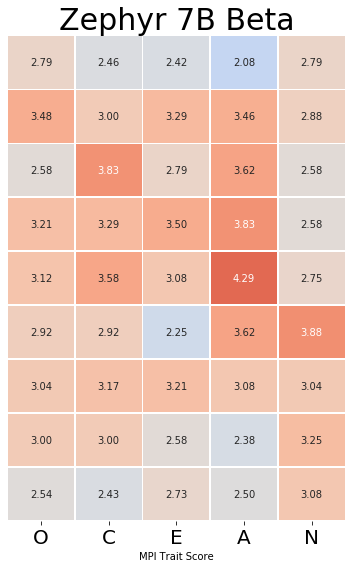

In [89]:
for focus_model in model_map.keys():
    tmp_df = mpi_df[(mpi_df['model']==focus_model) & (mpi_df['personality'].isin(personality_order))][['personality','O_mean', 'C_mean', 'E_mean','A_mean','N_mean']]
    tmp_df['order'] = pd.Categorical(tmp_df['personality'], categories=personality_order, ordered=True)
    tmp_df = tmp_df.sort_values(by='order').drop('order',axis=1)

    # Set 'Personality' column as the index
    tmp_df.set_index('personality', inplace=True)

    # Plot heatmap
    plt.figure(figsize=(5,8))
    ax = sns.heatmap(tmp_df, annot=True, cmap='coolwarm', vmin=0, vmax=5, fmt=".2f", linewidths=0.5, cbar=False)
    plt.title(f'{model_map[focus_model]}', fontsize=30)
    plt.xlabel('MPI Trait Score')
#     plt.ylabel('Personality Prompt')
#     plt.yticks(fontsize=12)
    plt.ylabel('')
    ax.set_yticks([])
    plt.xticks(ticks=plt.xticks()[0], labels=['O', 'C', 'E', 'A', 'N'], fontsize=20)
    plt.tight_layout()
    plt.show()